In [ ]:
#dataset: https://data.gov.sg/dataset/resale-flat-prices (hdb resale)
#dataset: https://data.gov.sg/dataset/private-residential-property-price-index-by-type-of-property?view_id=a2f1ffe8-e7b1-4fbb-8c41-c6a26e0456d4&resource_id=947b5cbe-0b0a-4fdb-b06e-aca1e34d87fd (private property)

In [1]:
# import python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()
plt.rcParams['figure.figsize']=[10,8]
import datetime


In [2]:
#load and read csv files

df=pd.read_csv('resale-flat-prices-based-on-approval-date-1990-1999.csv')
df1=pd.read_csv('resale-flat-prices-based-on-approval-date-2000-feb-2012.csv')
df3=pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv')
df4=pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')
df2=pd.read_csv('resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv')
df.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000


In [3]:
# drop 'block', 'street_name', 'flat_model' and 'storey_range' columns from all dataframes (df : df4)

col =['block','street_name','flat_model','storey_range']
file_list = [df,df1,df2,df3,df4]
for w in file_list:
    for i in col:
        w.drop(i,axis='columns',inplace=True)


In [4]:
# drop 'remaining_lease' column from df3 & df4 dataframes

col =['remaining_lease']
file_list = [df3,df4]
for w in file_list:
    for i in col:
        w.drop(i,axis='columns',inplace=True)

In [5]:
#concatenate into 5 dataframes (df : df4) into 1 dataframe df5

file_list = [df,df1,df2,df3,df4]
df5=pd.concat(file_list)

In [6]:
# review df5 dataframe 1st 5 rows

df5.head()

,month,town,flat_type,floor_area_sqm,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,31.0,1977,9000.0
1,1990-01,ANG MO KIO,1 ROOM,31.0,1977,6000.0
2,1990-01,ANG MO KIO,1 ROOM,31.0,1977,8000.0
3,1990-01,ANG MO KIO,1 ROOM,31.0,1977,6000.0
4,1990-01,ANG MO KIO,3 ROOM,73.0,1976,47200.0


In [7]:
#convert 'lease_commence_date' to datetime format

from datetime import datetime

date_list1=[]
date_2 = df5['lease_commence_date'].astype(str).values.tolist()
for j in date_2:
    obj1=datetime.strptime(j, '%Y')
    date_list1.append(obj1)
df5['lease_commence_date']=date_list1

In [8]:
#convert month to datetime format and assign to new column 'month_dt'

from datetime import datetime

date_list=[]
date_1 = df5['month'].astype(str).values.tolist()
for i in date_1:
    obj=datetime.strptime(i, '%Y-%m')
    date_list.append(obj)
df5['month_dt']=date_list

In [9]:
# compute days expired by subtracting 'month_dt' by 'lease_commence_date'.  This will give you the age of the flat.

df5['days_expired'] = df5['month_dt']-df5['lease_commence_date']


In [10]:
# compute remaining_lease by converting 'days_expired' into integer in years, subtracting it from 99 years.

df5['remaining_lease'] = (99-((pd.to_numeric(df5['days_expired'].dt.days, downcast='integer'))/365)).round(decimals=0)

In [11]:
# convert 'month' format to integer, removing the month part of the string to become 'yyyy'

df5['month']= [int(i[:-3]) for i in df5['month']]

In [12]:
#replace flat_type value of 'MULTI-GENERATION' and 'MULTI GENERATION' to 'MULTI_GENERATION'. 

df5['flat_type'].replace('MULTI-GENERATION','MULTI_GENERATION',inplace=True)
df5['flat_type'].replace('MULTI GENERATION','MULTI_GENERATION',inplace=True)

In [13]:
#create a new column "price_per_sqm"
#rename column name 'month' to 'year'


df5['price_per_sqm']=round(df5['resale_price']/df5['floor_area_sqm'],0)
df5.rename(columns={'month':'year'}, inplace=True)
df5.head()

,year,town,flat_type,floor_area_sqm,lease_commence_date,resale_price,month_dt,days_expired,remaining_lease,price_per_sqm
0,1990,ANG MO KIO,1 ROOM,31.0,1977-01-01,9000.0,1990-01-01,4748 days,86.0,290.0
1,1990,ANG MO KIO,1 ROOM,31.0,1977-01-01,6000.0,1990-01-01,4748 days,86.0,194.0
2,1990,ANG MO KIO,1 ROOM,31.0,1977-01-01,8000.0,1990-01-01,4748 days,86.0,258.0
3,1990,ANG MO KIO,1 ROOM,31.0,1977-01-01,6000.0,1990-01-01,4748 days,86.0,194.0
4,1990,ANG MO KIO,3 ROOM,73.0,1976-01-01,47200.0,1990-01-01,5114 days,85.0,647.0


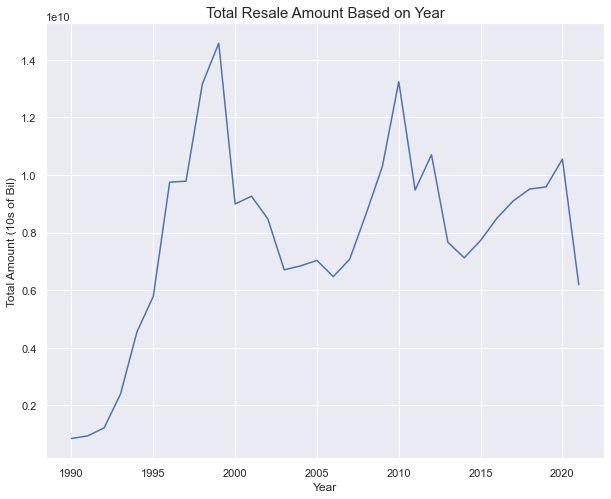

In [21]:
#find out the total amount of resale based on year

df5_1=df5.groupby('year')['resale_price'].agg(np.sum).reset_index()
plt.plot(df5_1.year, df5_1.resale_price);
plt.xlabel('Year');
plt.ylabel('Total Amount (10s of Bil)');
plt.title('Total Resale Amount Based on Year', fontsize=15);

In [14]:
#reorder columns

df5=df5[['year','town','flat_type','floor_area_sqm','resale_price','price_per_sqm',\
         'lease_commence_date','remaining_lease','days_expired','month_dt']]

In [15]:
#reviewing df5 dataframe

df5.head()

,year,town,flat_type,floor_area_sqm,resale_price,price_per_sqm,lease_commence_date,remaining_lease,days_expired,month_dt
0,1990,ANG MO KIO,1 ROOM,31.0,9000.0,290.0,1977-01-01,86.0,4748 days,1990-01-01
1,1990,ANG MO KIO,1 ROOM,31.0,6000.0,194.0,1977-01-01,86.0,4748 days,1990-01-01
2,1990,ANG MO KIO,1 ROOM,31.0,8000.0,258.0,1977-01-01,86.0,4748 days,1990-01-01
3,1990,ANG MO KIO,1 ROOM,31.0,6000.0,194.0,1977-01-01,86.0,4748 days,1990-01-01
4,1990,ANG MO KIO,3 ROOM,73.0,47200.0,647.0,1976-01-01,85.0,5114 days,1990-01-01


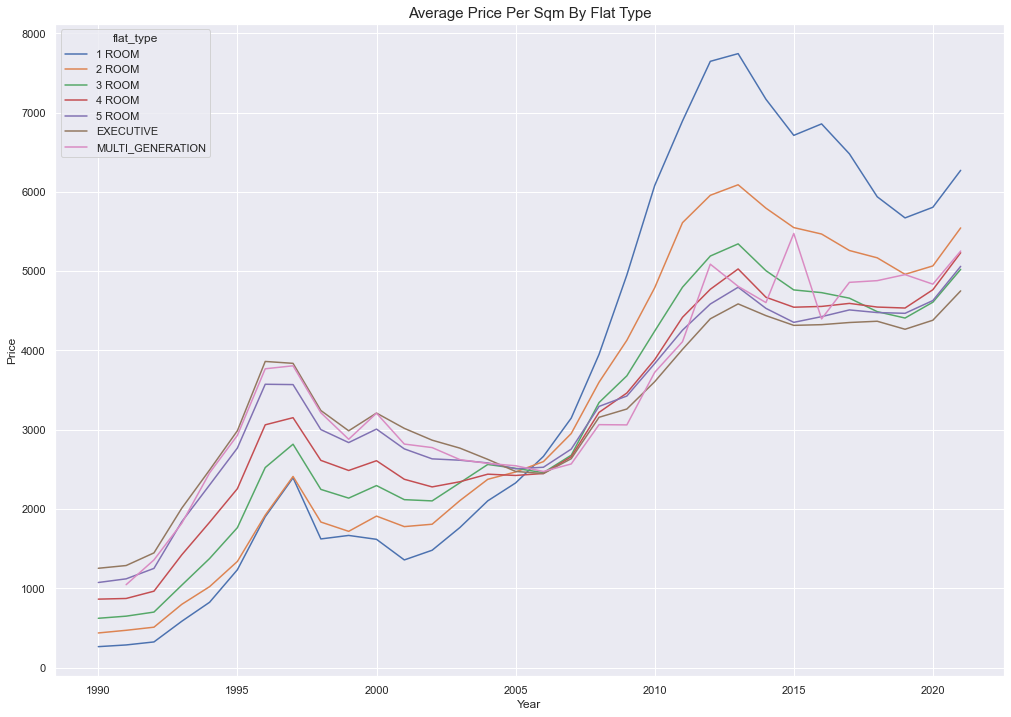

In [338]:
# plot the average price per sqm by flat type

from numpy import mean
df5_type = df5.sort_values(by='flat_type')

fig = plt.gcf();
fig.set_size_inches(17,12);
sns.lineplot(data=df5_type, x='year', y='price_per_sqm', hue='flat_type', estimator=mean, palette='deep', ci=None);
plt.xlabel('Year');
plt.ylabel('Price');
plt.title('Average Price Per Sqm By Flat Type', fontsize=15);

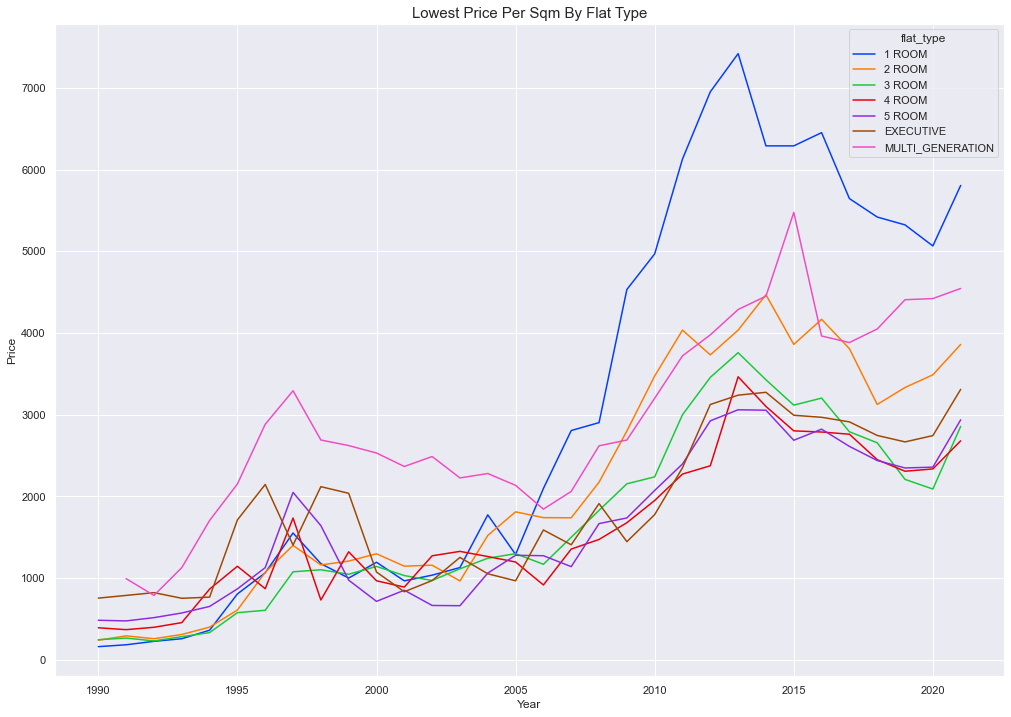

In [339]:
# plot the lowest price per sqm by flat type 

from numpy import mean
df5_type = df5.sort_values(by='flat_type')

fig = plt.gcf();
fig.set_size_inches(17,12);
sns.lineplot(data=df5_type, x='year', y='price_per_sqm', hue='flat_type', estimator=min, palette='bright', ci=None);
plt.xlabel('Year');
plt.ylabel('Price');
plt.title('Lowest Price Per Sqm By Flat Type', fontsize=15);

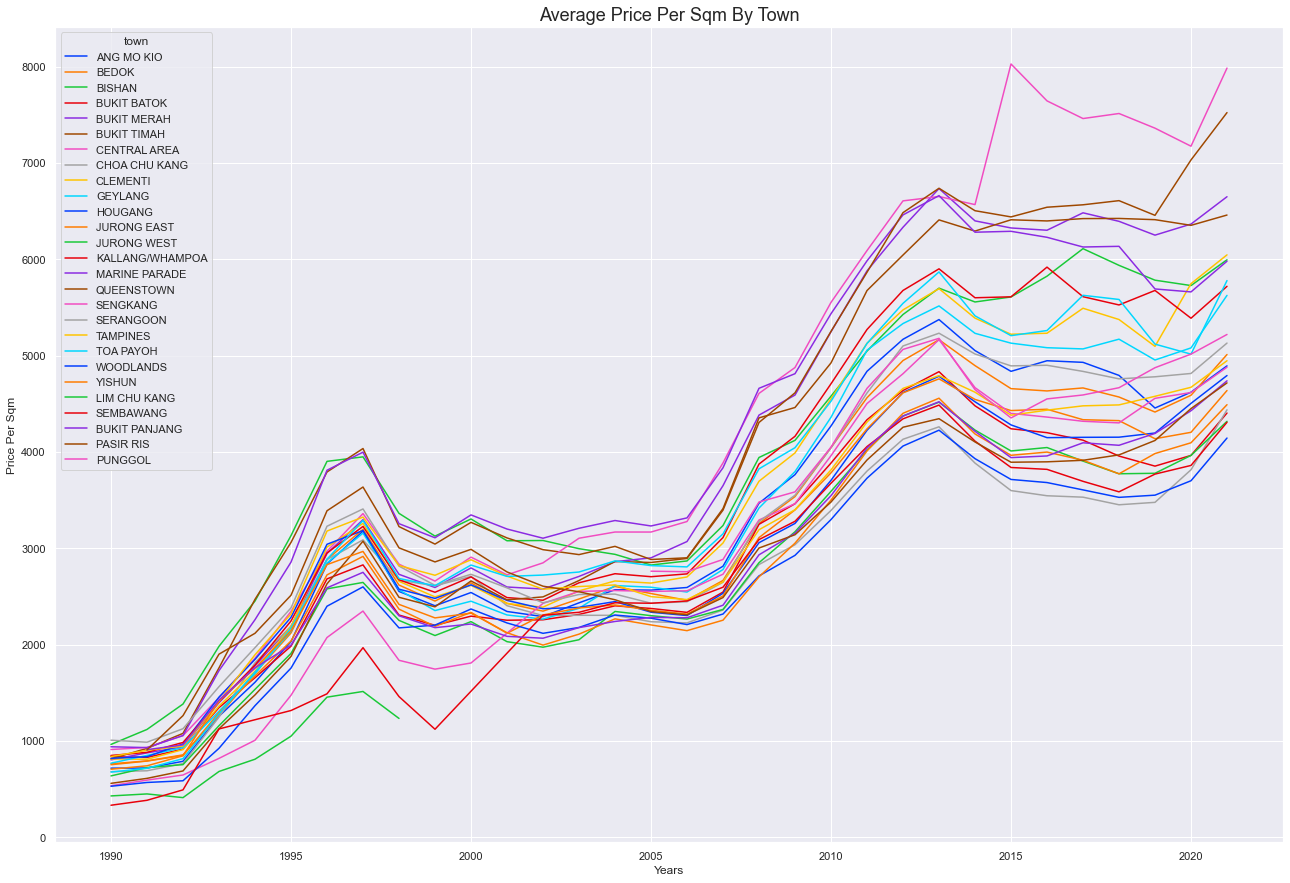

In [341]:
# plot the average price of all flat types by town

from numpy import mean

fig=plt.gcf();
fig.set_size_inches(22,15);
#df5_town = df5.sort_values(by='town')

sns.lineplot(data=df5, x='year', y='price_per_sqm', hue='town', estimator = mean, palette = 'bright', ci=None);
plt.xlabel('Years');
plt.ylabel('Price Per Sqm');
plt.title('Average Price Per Sqm By Town', fontsize=18);

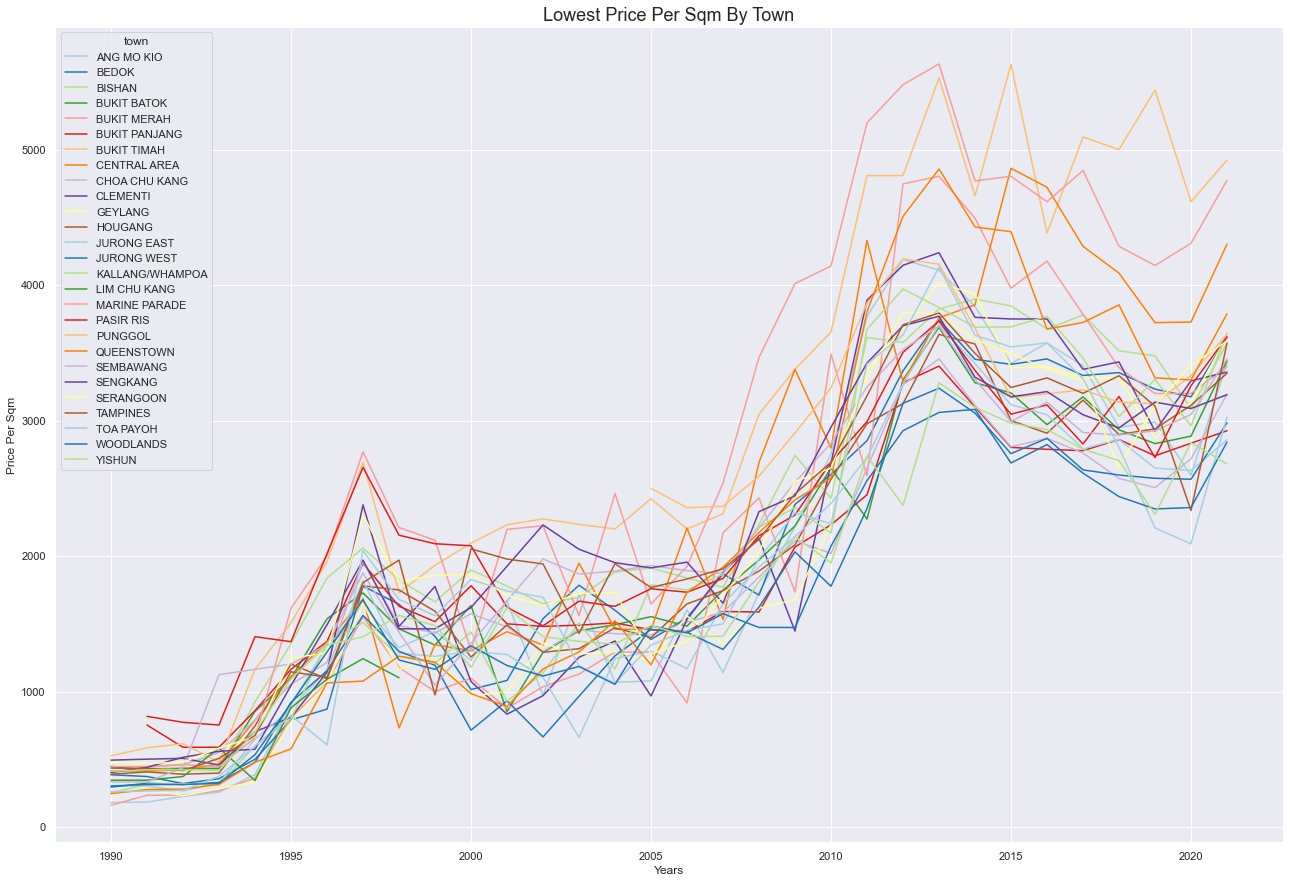

In [196]:
#plot the lowerst price per sqm by town

fig=plt.gcf();
fig.set_size_inches(22,15);
df5_town = df5.sort_values(by='town')

sns.lineplot(data=df5_town, x='year', y='price_per_sqm', hue='town', estimator = min, palette = 'Paired',ci=None);
plt.xlabel('Years');
plt.ylabel('Price Per Sqm');
plt.title('Lowest Price Per Sqm By Town', fontsize=18);

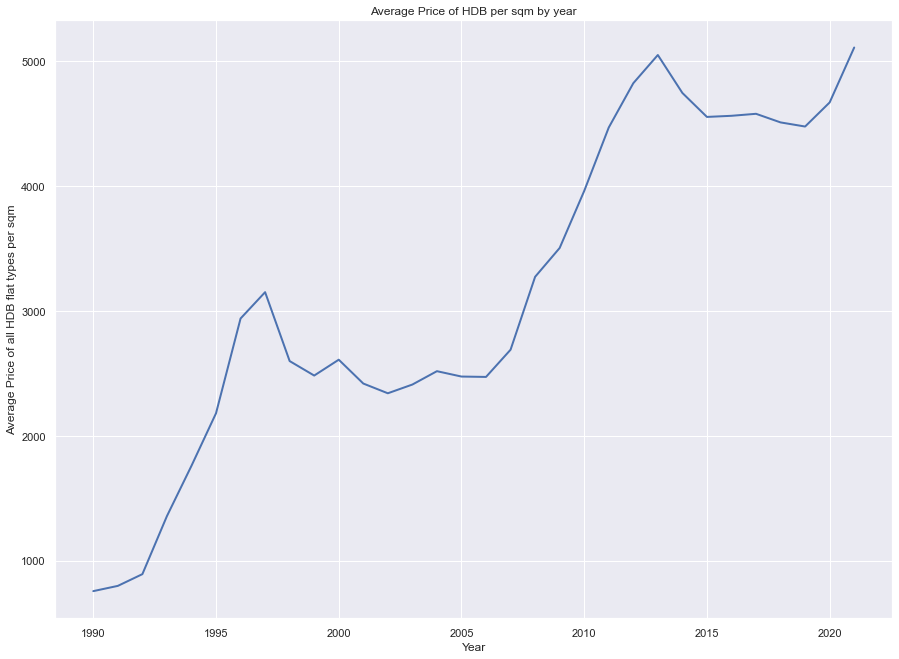

In [226]:
#plot average HDB price by year
df_mean= round(df5.groupby('year')['price_per_sqm'].agg(np.mean).to_frame(),0)
df_mean.reset_index(inplace=True)

fig = plt.gcf();
fig.set_size_inches(15,11);
plt.plot(df_mean['year'],df_mean['price_per_sqm'],linewidth=2);
plt.xlabel('Year');
plt.ylabel('Average Price of all HDB flat types per sqm');
plt.title('Average Price of HDB per sqm by year');



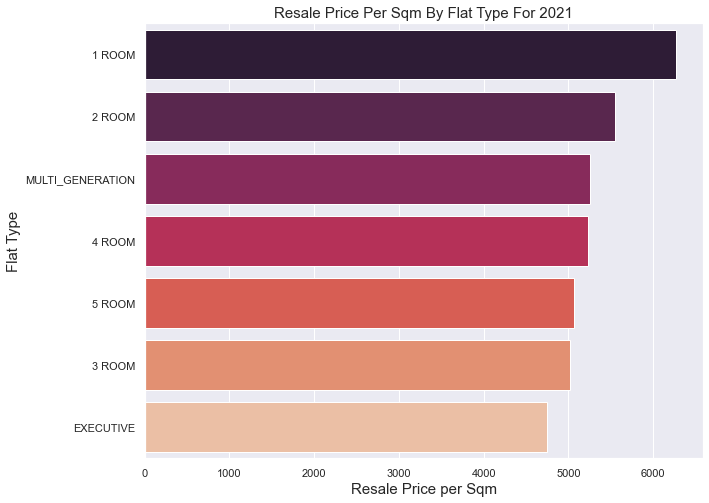

In [225]:
#plot chart to visualize resale price comparison based on flat type for year 2021

fig = plt.gcf()
fig.set_size_inches(10,8)

df6=df5[df5['year']>2020]
df_px_type_2020_now = round(df6.groupby('flat_type')['price_per_sqm'].agg(np.mean).to_frame(),0)
df_px_type_2020_now.reset_index(inplace=True)
df_px_type_2020_now.sort_values('price_per_sqm', ascending=False, inplace=True)

sns.barplot(x='price_per_sqm',y='flat_type', data=df_px_type_2020_now, palette='rocket');
plt.title('Resale Price Per Sqm By Flat Type For 2021', fontsize=15);
plt.xlabel('Resale Price per Sqm', fontsize=15);
plt.ylabel('Flat Type',fontsize=15);

In [197]:
#create dataframe for resale price based on town (> year 2020)

df6=df5[df5['year']>2020]

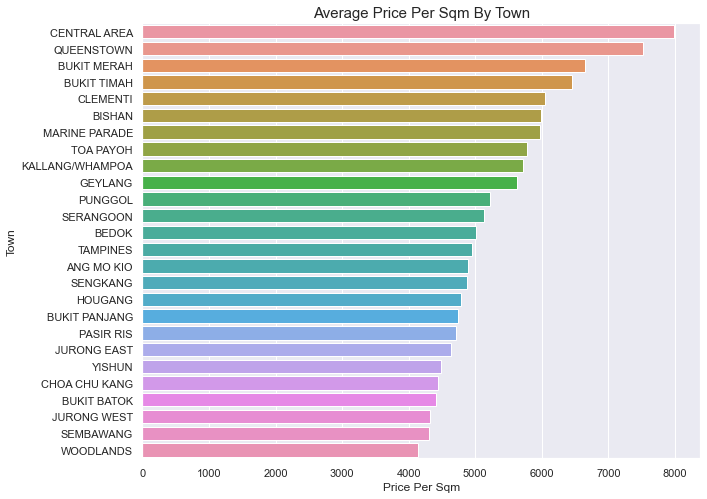

In [148]:
# plot chart of price per sqm sort by town and rank 

result=df6.groupby('town')['price_per_sqm'].agg(np.mean).reset_index().sort_values('price_per_sqm', ascending=False)
sns.barplot(data=result, x='price_per_sqm', y='town', ci=None);
plt.xlabel('Price Per Sqm');
plt.ylabel('Town');
plt.title('Average Price Per Sqm By Town', fontsize=15);

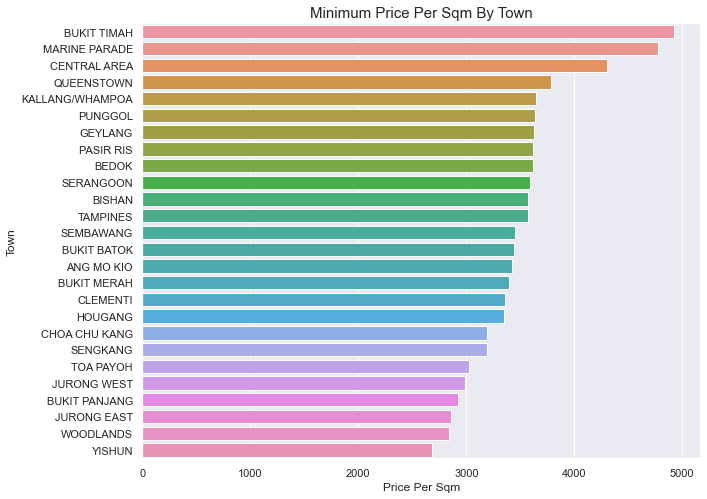

In [198]:
# plot chart of price per sqm sort by town and rank them

result=df6.groupby('town')['price_per_sqm'].agg(np.min).reset_index().sort_values('price_per_sqm', ascending=False)
sns.barplot(data=result, x='price_per_sqm', y='town', ci=None);
plt.xlabel('Price Per Sqm');
plt.ylabel('Town');
plt.title('Minimum Price Per Sqm By Town', fontsize=15);

In [199]:
# create a dataframe of price per Sqm based on remaining leases

rng_lease=df5.groupby('remaining_lease')['price_per_sqm'].agg(np.mean).reset_index()

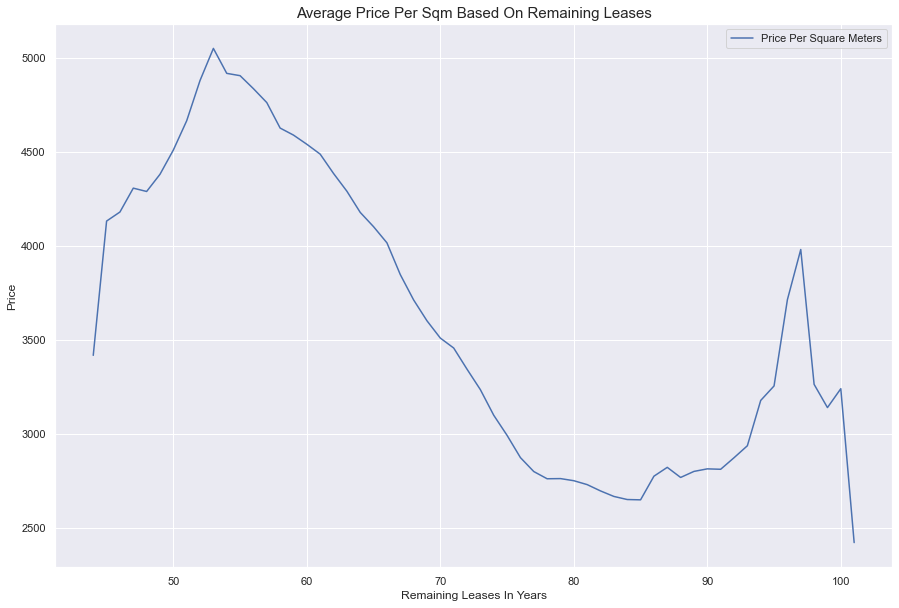

In [200]:
# plot a line of price per sqm based on remaining years

fig =plt.gcf()
fig.set_size_inches(15,10)
plt.plot(rng_lease['remaining_lease'],rng_lease['price_per_sqm']);
plt.xlabel('Remaining Leases In Years');
plt.ylabel('Price');
plt.legend(['Price Per Square Meters']);
plt.title('Average Price Per Sqm Based On Remaining Leases', fontsize=15);

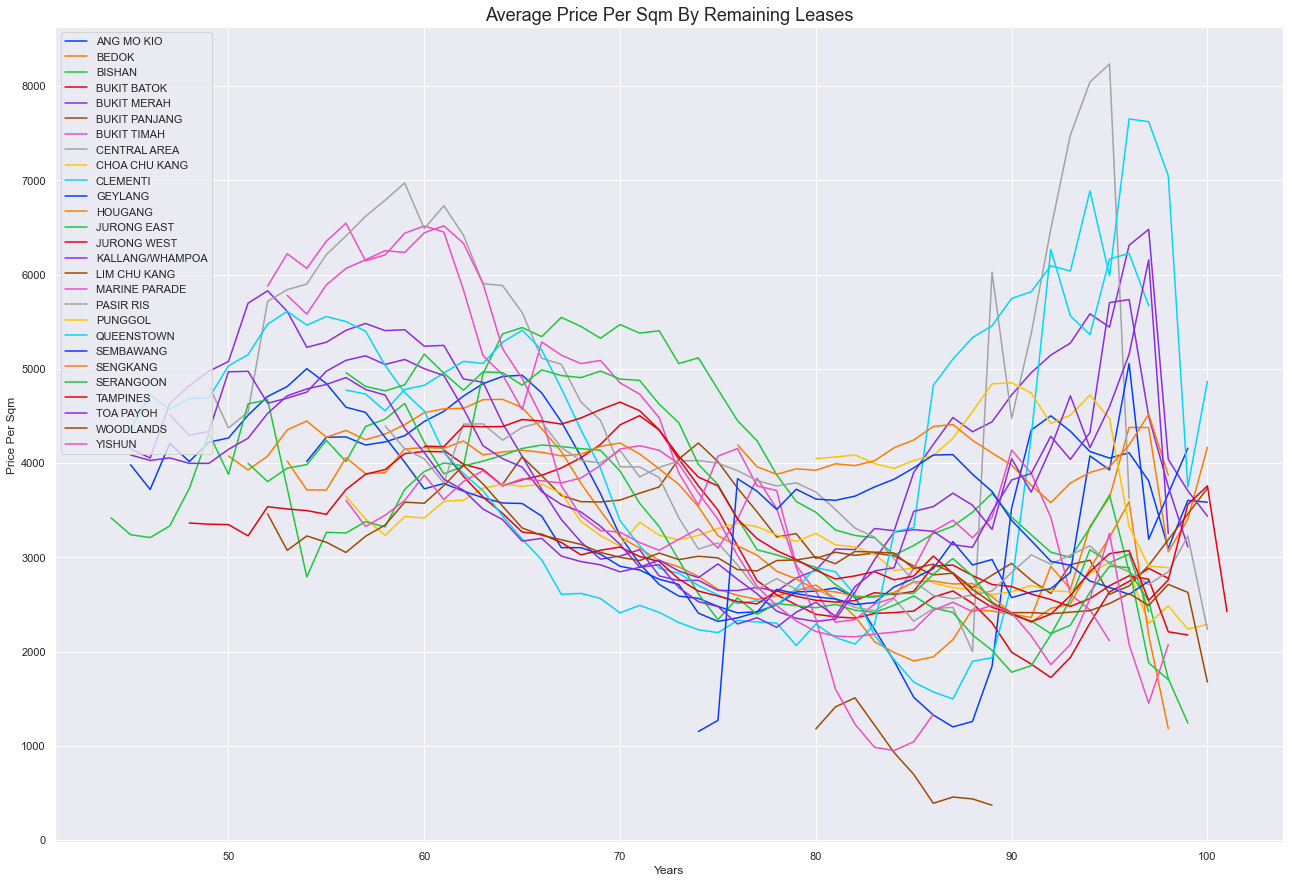

In [342]:
fig=plt.gcf()
fig.set_size_inches(22,15)

df5_rem=df5.sort_values(by='town')

sns.lineplot(x='remaining_lease', y='price_per_sqm', data=df5_rem, hue='town', estimator = mean, ci=None, palette='bright');
plt.xlabel('Years');
plt.ylabel('Price Per Sqm');
plt.title('Average Price Per Sqm By Remaining Leases', fontsize=18);
plt.legend(loc='upper left');

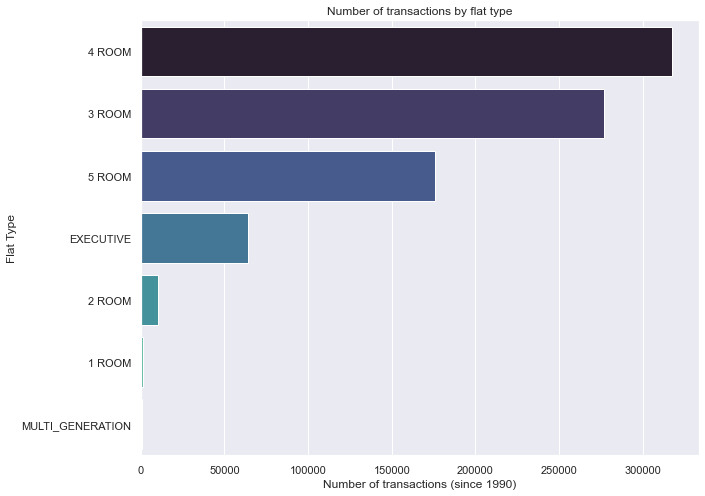

In [230]:
#create chart to show number of transactions since 1990

fig=plt.gcf()
fig.set_size_inches(10,8)

sns.countplot(y='flat_type', data=df5, order = df5['flat_type'].value_counts().index, palette='mako');
plt.xlabel('Number of transactions (since 1990)');
plt.ylabel('Flat Type');
plt.title('Number of transactions by flat type');

In [229]:
# overview of relationship between different features

df5.corr()

,year,floor_area_sqm,resale_price,price_per_sqm,remaining_lease,town_le
year,1.000000,0.072927,0.616645,0.754623,-0.443013,0.067468
floor_area_sqm,0.072927,1.000000,0.615971,0.117575,0.376398,0.136495
resale_price,0.616645,0.615971,1.000000,0.827965,-0.013456,0.056233
price_per_sqm,0.754623,0.117575,0.827965,1.000000,-0.278901,-0.007735
remaining_lease,-0.443013,0.376398,-0.013456,-0.278901,1.000000,0.156406
town_le,0.067468,0.136495,0.056233,-0.007735,0.156406,1.000000


In [212]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score

0.377000158994813

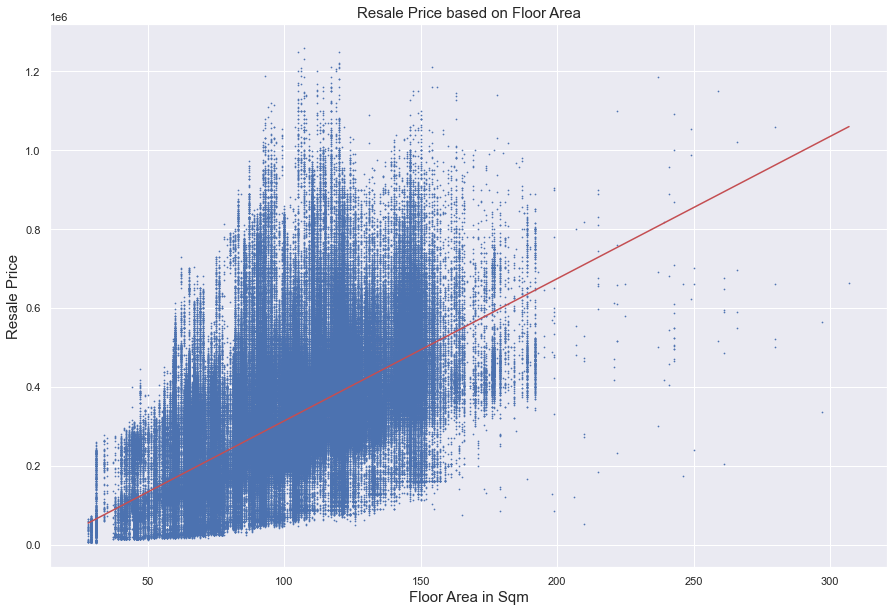

In [215]:
#creating a scatter plot to find out the correlation between floor area and resale price

fig = plt.gcf()
fig.set_size_inches(15,10)

plt.scatter(df5['floor_area_sqm'],df5['resale_price'],s=.5);
plt.xlabel('Floor Area in Sqm', fontsize=15);
plt.ylabel('Resale Price', fontsize=15);
plt.title('Resale Price based on Floor Area', fontsize=15);

x= df5['floor_area_sqm'].values.reshape(-1,1)
y= df5['resale_price']

x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)
lm = LinearRegression()
lm.fit(x_train,y_train)
b = lm.intercept_
m = lm.coef_

func1 = lambda x: m*x + b

y1=np.array([func1(28), func1(307)])
x1=np.array([28,307])
plt.plot(x1,y1, c='r');

lm.score(x_test, y_test)

8.572899115100174e-05

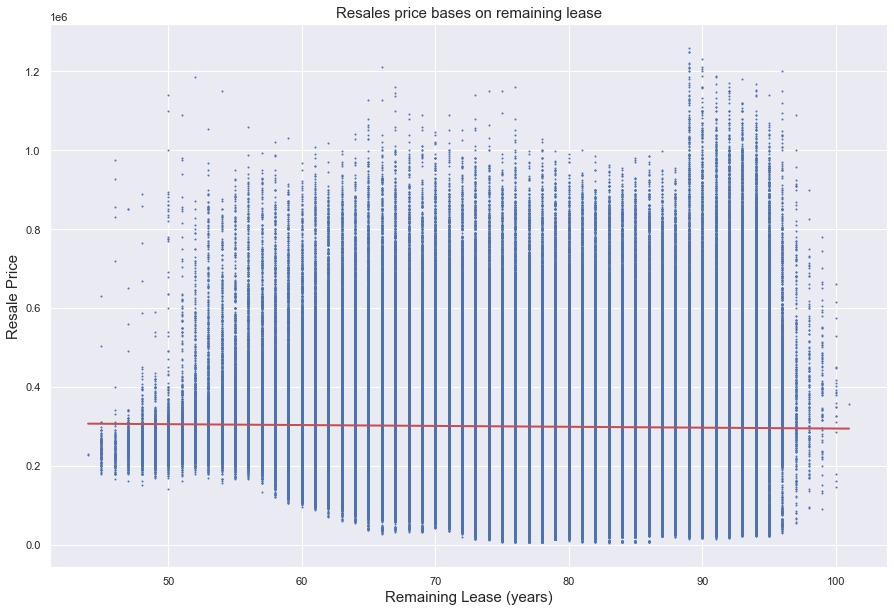

In [102]:
# creating a scatter plot finding out how price response with changes in remaining lease

fig = plt.gcf()
fig.set_size_inches(15,10)
plt.scatter(df5['remaining_lease'],df5['resale_price'], s=1);
plt.xlabel('Remaining Lease (years)', fontsize=15);
plt.ylabel('Resale Price', fontsize=15);
plt.title('Resales price bases on remaining lease', fontsize=15);



# creating a regression line to show the correlation between resale price and remaining leases

x = df5['remaining_lease'].values.reshape(-1,1)
y = df5['resale_price']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)
lm = LinearRegression()
lm.fit(x_train, y_train)

func=lambda x: lm.coef_*x + lm.intercept_
y=np.array([func(df5['remaining_lease'].min()), func(df5['remaining_lease'].max())])
x=np.array([df5['remaining_lease'].min(),df5['remaining_lease'].max()])

plt.plot(x,y, linewidth=2, c='r');

lm.score(x_test, y_test)

In [216]:
# compute dummy variables for 'town'

le1 = preprocessing.LabelEncoder()

In [217]:
le1.fit(df5['town'])

LabelEncoder()

In [218]:
df5['town_le']=le1.transform(df5['town'])

In [219]:
df5.corr()

,year,floor_area_sqm,resale_price,price_per_sqm,remaining_lease,town_le
year,1.000000,0.072927,0.616645,0.754623,-0.443013,0.067468
floor_area_sqm,0.072927,1.000000,0.615971,0.117575,0.376398,0.136495
resale_price,0.616645,0.615971,1.000000,0.827965,-0.013456,0.056233
price_per_sqm,0.754623,0.117575,0.827965,1.000000,-0.278901,-0.007735
remaining_lease,-0.443013,0.376398,-0.013456,-0.278901,1.000000,0.156406
town_le,0.067468,0.136495,0.056233,-0.007735,0.156406,1.000000


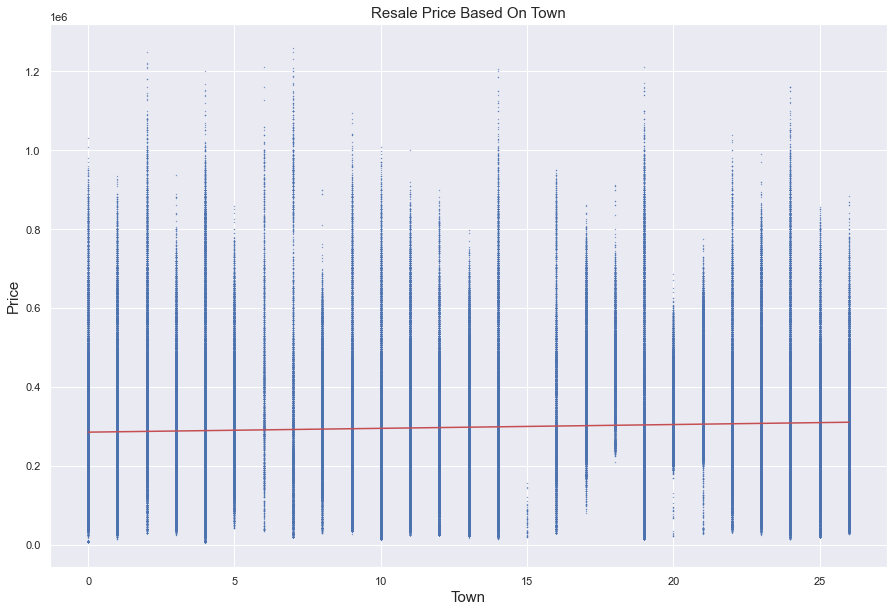

In [220]:
# find out how price responds to location aka 'town'

fig = plt.gcf()
fig.set_size_inches(15,10)
plt.scatter(df5['town_le'],df5['resale_price'],s=.1);
plt.xlabel('Town', fontsize=15);
plt.ylabel('Price', fontsize=15);
plt.title('Resale Price Based On Town', fontsize=15)

x=df5['town_le'].values.reshape(-1,1)
y=df5['resale_price']

# plot a line best represents the relationship between price and town

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)
lm = LinearRegression()
lm.fit(x_train, y_train)
m = lm.coef_
b = lm.intercept_
x_min = df5['town_le'].min()
x_max = df5['town_le'].max()

func = lambda x: m*x + b
x1 = np.array([x_min, x_max])
y1 = np.array([func(x_min), func(x_max)])
plt.plot(x1,y1, c='r');

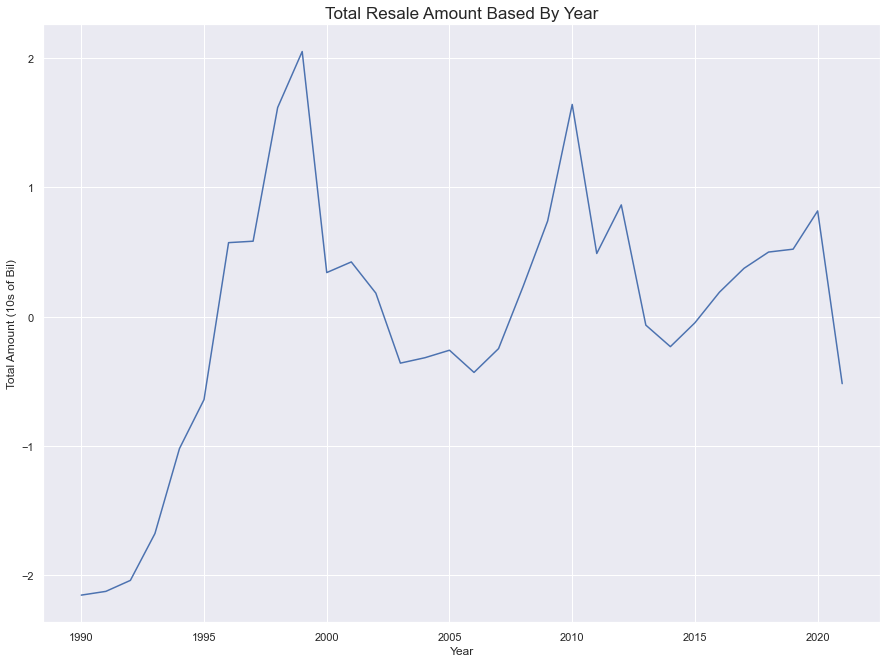

In [100]:
# correlation between total resale amount and price per sqm and standardize the value

#find out the total amount of resale based on year

from sklearn.preprocessing import StandardScaler
df5_1=df5.groupby('year')['resale_price'].agg(np.sum).reset_index()
scaler = StandardScaler()
y=df5_1['resale_price'].values.reshape(-1,1)
scaler=StandardScaler()
df5_1['resale_price_sc'] = scaler.fit_transform(y)


fig = plt.gcf();
fig.set_size_inches(15,11);
plt.plot(df5_1.year, df5_1.resale_price_sc);
plt.xlabel('Year');
plt.ylabel('Total Amount (10s of Bil)');
plt.title('Total Resale Amount Based By Year', fontsize=17);

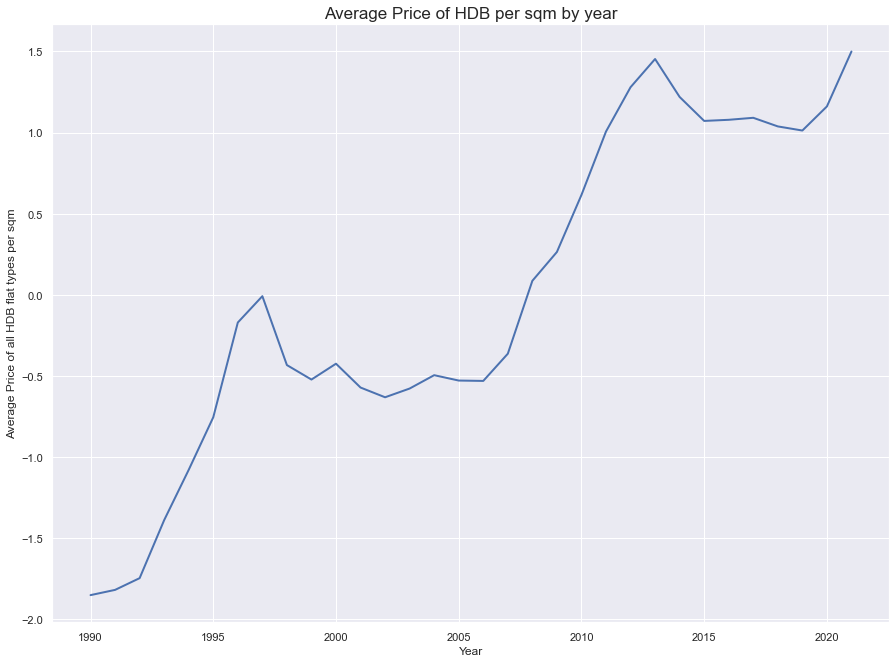

In [99]:
#plot average HDB price by year and standardize the values

df_mean= round(df5.groupby('year')['price_per_sqm'].agg(np.mean).to_frame(),0)
df_mean.reset_index(inplace=True)
m=df_mean['price_per_sqm'].values.reshape(-1,1)
scaler1 = StandardScaler()
df_mean['price_per_sqm_sc'] = scaler1.fit_transform(m)

fig = plt.gcf();
fig.set_size_inches(15,11);
plt.plot(df_mean['year'],df_mean['price_per_sqm_sc'],linewidth=2);
plt.xlabel('Year');
plt.ylabel('Average Price of all HDB flat types per sqm');
plt.title('Average Price of HDB per sqm by year', fontsize=17);


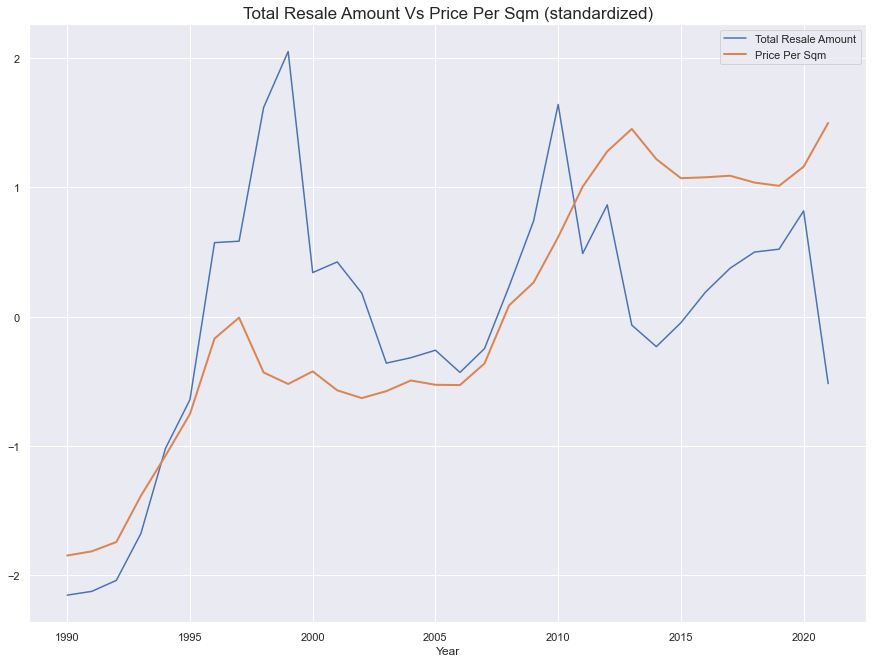

In [101]:
# combining the 2 charts after values has been standardized

fig = plt.gcf();
fig.set_size_inches(15,11);

plt.plot(df5_1.year, df5_1['resale_price_sc']);
plt.plot(df_mean['year'],df_mean['price_per_sqm_sc'],linewidth=2);
plt.legend(['Total Resale Amount','Price Per Sqm']);
plt.xlabel('Year');
plt.title('Total Resale Amount Vs Price Per Sqm (standardized)', fontsize=17);

In [58]:
# load and read private property price index

dfp = pd.read_csv('private-residential-property-price-index-base-quarter-2009-q1-100.csv')

In [59]:
dfp.head()

,quarter,level_1,value
0,1975-Q1,Residential Properties,8.9
1,1975-Q2,Residential Properties,9.1
2,1975-Q3,Residential Properties,9.1
3,1975-Q4,Residential Properties,9.1
4,1976-Q1,Residential Properties,9.5


In [60]:
dfp.shape

(181, 3)

In [61]:
# format year column

dfp['year']=[i[:-3] for i in dfp['quarter']]

In [62]:
dfp.head()

,quarter,level_1,value,year
0,1975-Q1,Residential Properties,8.9,1975
1,1975-Q2,Residential Properties,9.1,1975
2,1975-Q3,Residential Properties,9.1,1975
3,1975-Q4,Residential Properties,9.1,1975
4,1976-Q1,Residential Properties,9.5,1976


In [63]:
# re-ordering column names

dfp[['year','quarter','level_1','value']]

,year,quarter,level_1,value
0,1975,1975-Q1,Residential Properties,8.9
1,1975,1975-Q2,Residential Properties,9.1
2,1975,1975-Q3,Residential Properties,9.1
3,1975,1975-Q4,Residential Properties,9.1
4,1976,1976-Q1,Residential Properties,9.5
...,...,...,...,...
176,2019,2019-Q1,Residential Properties,148.6
177,2019,2019-Q2,Residential Properties,150.8
178,2019,2019-Q3,Residential Properties,152.8
179,2019,2019-Q4,Residential Properties,153.6


In [64]:
# compute average price by year

dfp_yr=dfp.groupby('year')['value'].agg(np.mean).to_frame()

In [65]:
dfp_yr.reset_index(inplace=True)

In [66]:
# format year to integter

dfp_yr['year']=[int(j) for j in dfp_yr['year']]

In [67]:
# create dataframe for transactions after 1989

dfp_yr=dfp_yr[dfp_yr['year']>1989]

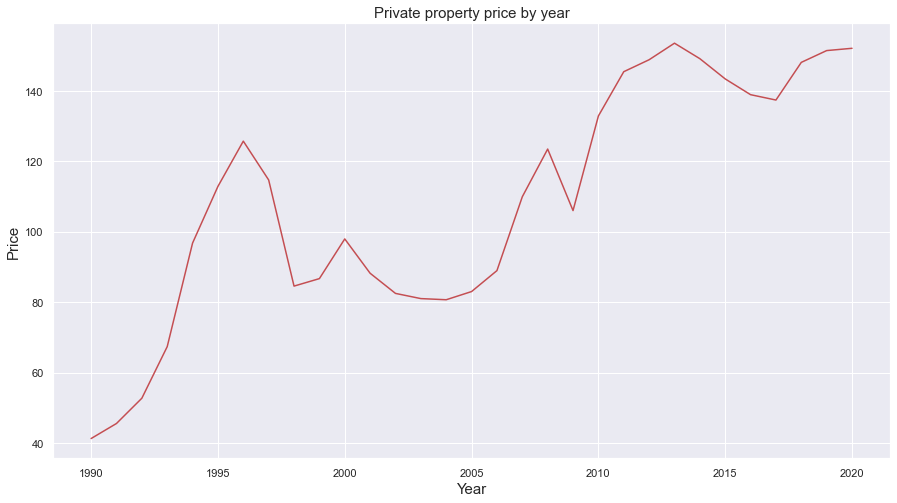

In [68]:
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.plot(dfp_yr['year'],dfp_yr['value'], c='r');
plt.xlabel('Year', fontsize=15);
plt.ylabel('Price', fontsize=15);
plt.title('Private property price by year', fontsize=15);

Text(0.5, 1.0, 'HDB price by year')

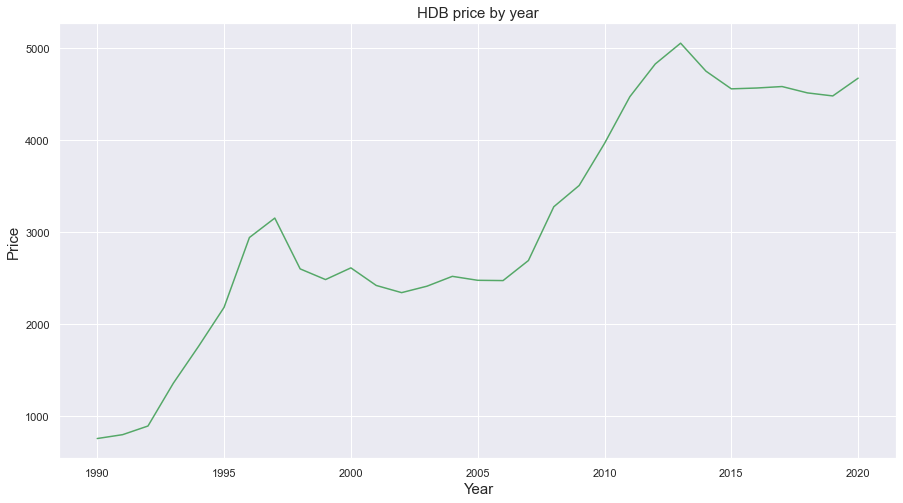

In [69]:
# create dataframe for HDB for year before 2021 to align with private property price index

fig=plt.gcf()
fig.set_size_inches(15,8)
df_mean_1=df_mean[df_mean['year']<2021]
plt.plot(df_mean_1['year'],df_mean_1['price_per_sqm'],c = 'g');
plt.xlabel('Year',fontsize=15);
plt.ylabel('Price',fontsize=15);
plt.title('HDB price by year',fontsize=15)

In [70]:
dfp_t=pd.read_csv('private-residential-property-price-index-by-type-of-property-base-quarter-2009-q1-100.csv')

In [82]:
dfp_t['level_2'].value_counts()

Landed        181
Non-landed    181
Name: level_2, dtype: int64